<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  FINAL PROJECT: RESEARCHING ON HOTEL BOOKING DEMAND 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Analyzing questions 📌
</div>

## **TABLE OF CONTENTS** 🔠 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
cleaned_data = pd.read_csv('./data/clean_data/processed_data.csv')
cleaned_data.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,a_d_r,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_type
0,False,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,False,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort hotel
1,False,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,False,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
2,False,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,False,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort hotel
3,False,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort hotel
4,False,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,False,0,0,C,C,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,resort hotel


## **Question 2 🔔** 

❓ A possible question is: How the factors involving **customers' booking behaviour** contribute to the hotel's performance relating to **cancelation rate** or **repeated guests rate** ?

✅ Answering this question will help the operators on hotels of two types could have insight into the possibility of canceling bookings or rebooking lodge. From that, based on the conclusion, operators could propose more attractive policy to keep the hotel's performance at a good range.

💡 How we answer this question:

* First, from 2 feature `is_canceled` and `is_repeated_guest`, we would analyze and choose out what could be best presented as the output for hotel's performance.
* After that, we will start to visualizing features relating **customers' booking behaviour**, including, then draw out the final conclusion.

### **STAGE 1:** Choose output feature for assessment 📝

🧮 Considering how the features `is_canceled` is distributed

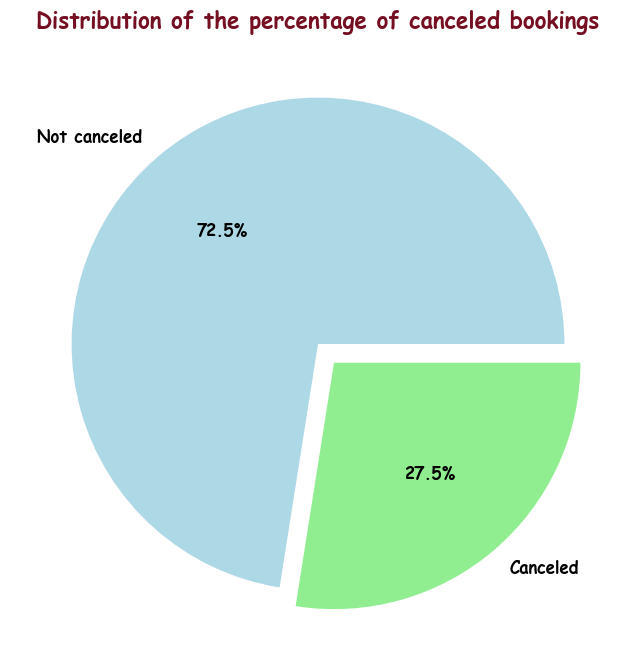

In [3]:
# use pie chart to see how the feature `is_canceled` is distributed
plt.figure(figsize=(8, 8))
plt.pie(cleaned_data['is_canceled'].value_counts(), labels=['Not canceled', 'Canceled'], autopct='%1.1f%%', explode=(0, 0.1), colors=['lightblue', 'lightgreen'], textprops={'fontsize': 12, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold'})
plt.title('Distribution of the percentage of canceled bookings', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.show()

`COMMENT`: We could see that this feature `is_canceled` is also a truly crucial factor in deciding whether a hotel booking is sucessful or not. The `Canceled` part also take a quite large piece on the pie chart, roughly 27.5%.
* Therefore, I decide to give this feature a weight in the group `importance`.

🧮 Considering how the feature `is_repeated_guest` is distributed.

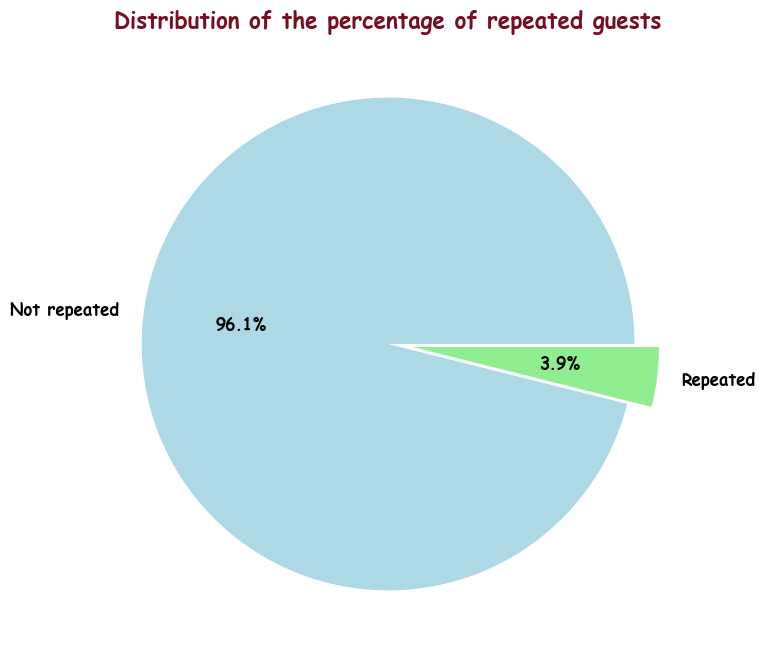

In [4]:
plt.figure(figsize=(8, 8))
plt.pie(cleaned_data['is_repeated_guest'].value_counts(), labels=['Not repeated', 'Repeated'], autopct='%1.1f%%', explode=(0, 0.1), colors=['lightblue', 'lightgreen'], textprops={'fontsize': 12, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold'})
plt.title('Distribution of the percentage of repeated guests', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.show()

`COMMENT`: From the pie chart ploted, we could see that most of the guests are not in group of repeated guests. Therefore, we decide to list this feature in the group `less importance`.

### **STAGE 1:** Considering customer's behaviour 📝

1. First, we will consider `lead_time` of customer's booking behaviour. 

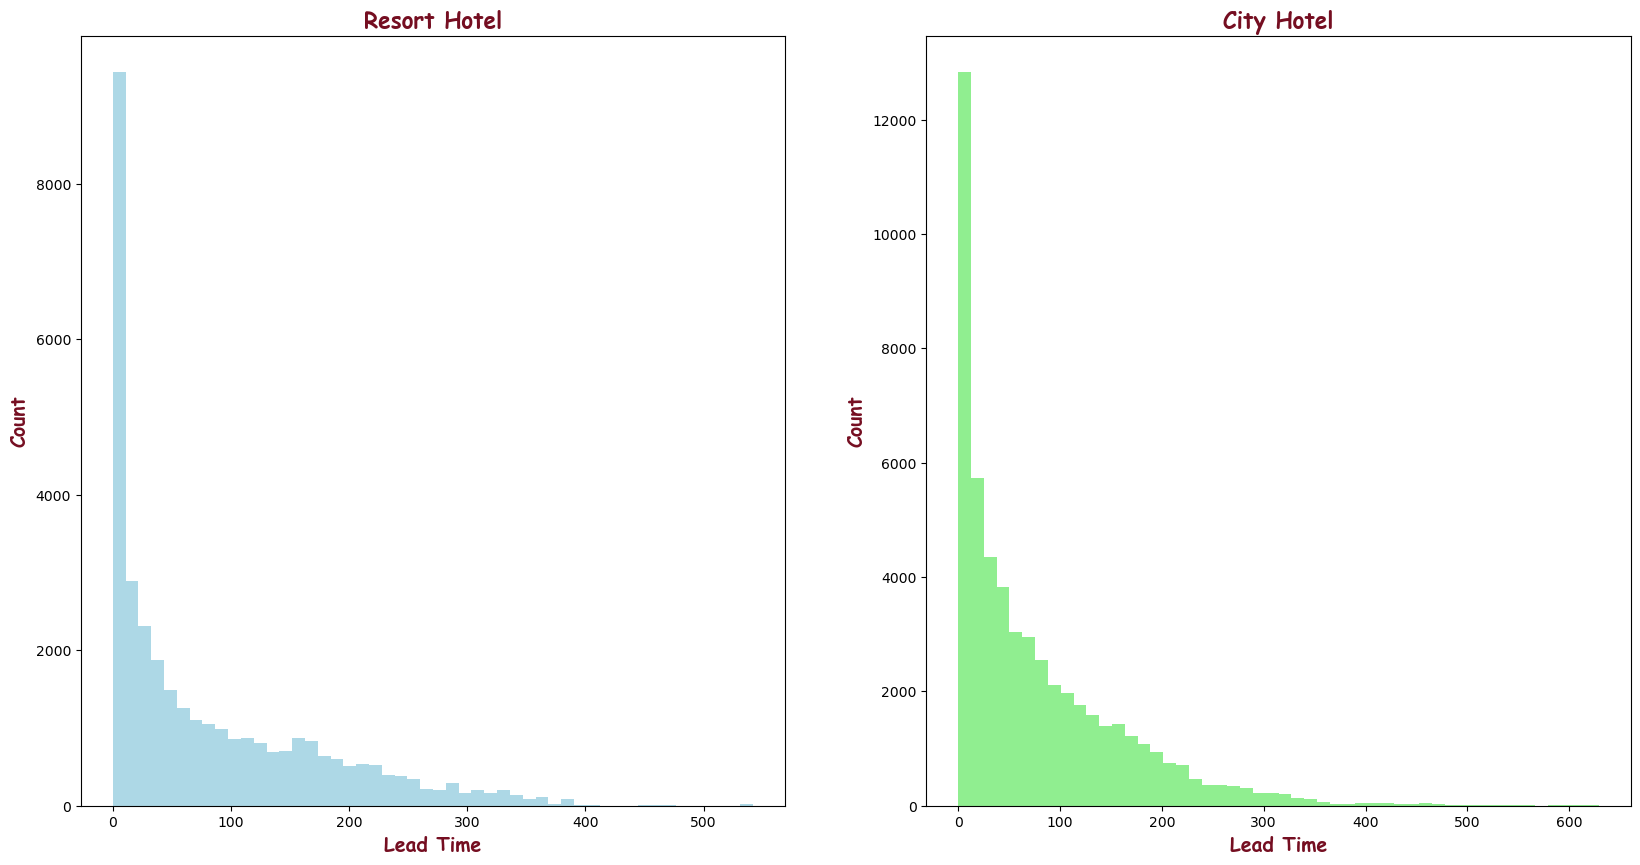

In [5]:
resort_hotel = cleaned_data[cleaned_data['hotel_type'] == 'resort hotel']
city_hotel = cleaned_data[cleaned_data['hotel_type'] == 'city hotel']

# using histogram to see the distribution of lead_time
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].hist(resort_hotel['lead_time'], bins=50, color='lightblue')
axs[1].hist(city_hotel['lead_time'], bins=50, color='lightgreen')
axs[0].set_title('Resort Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_title('City Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_xlabel('Lead Time', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_xlabel('Lead Time', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})

plt.show()


`COMMENT:`
- From the histograms above, we could see that most of customers don't have the behaviour of booking for hotels in advanced for a very long time.
- The period of reservation < 50 days is recored on the half of total sample data.

Text(0, 0.5, 'Cancellation Rate')

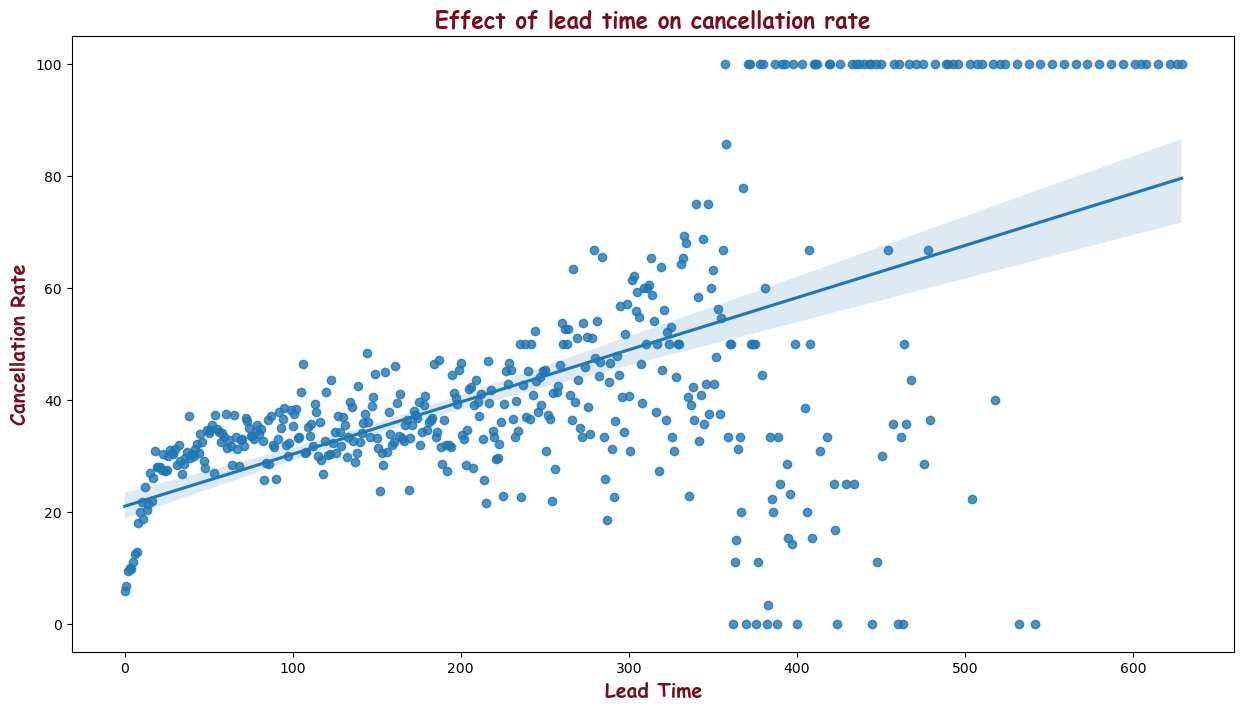

In [12]:
# Get effect of lead time on cancellation rate
lead_cancel_data = cleaned_data.groupby("lead_time")["is_canceled"].mean()

plt.figure(figsize=(15, 8))
sns.regplot(x = lead_cancel_data.index, y = lead_cancel_data.values * 100)

plt.title("Effect of lead time on cancellation rate", fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.xlabel("Lead Time", fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.ylabel("Cancellation Rate", fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})


`COMMENT`: We could see that bookings made a few days before check-in date are rarely canceled, while reservations that are made more than 300 days (1 years) have a high percentage of cancellation. 

Text(0, 0.5, 'Lead Time')

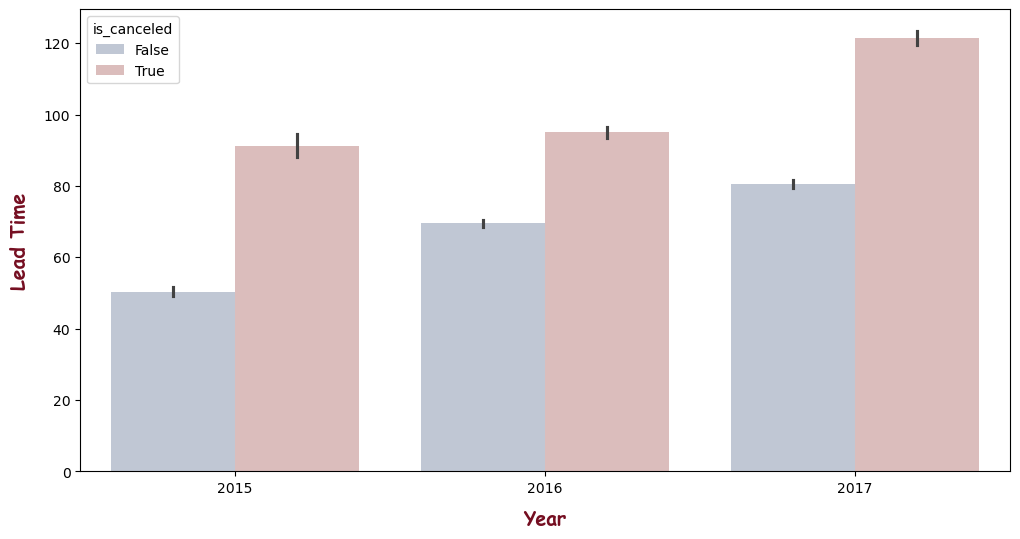

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= cleaned_data, palette='vlag')
plt.xlabel('Year', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)
plt.ylabel('Lead Time', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)


`COMMENT`: Over the years, we could saw an upward trend for reservations before a long number of days before arrival; which means the rate of cancelation is also increased years by years.

2. Secondly, we consider `stays_in_weekend_nights` and `stays_in_week_nights`

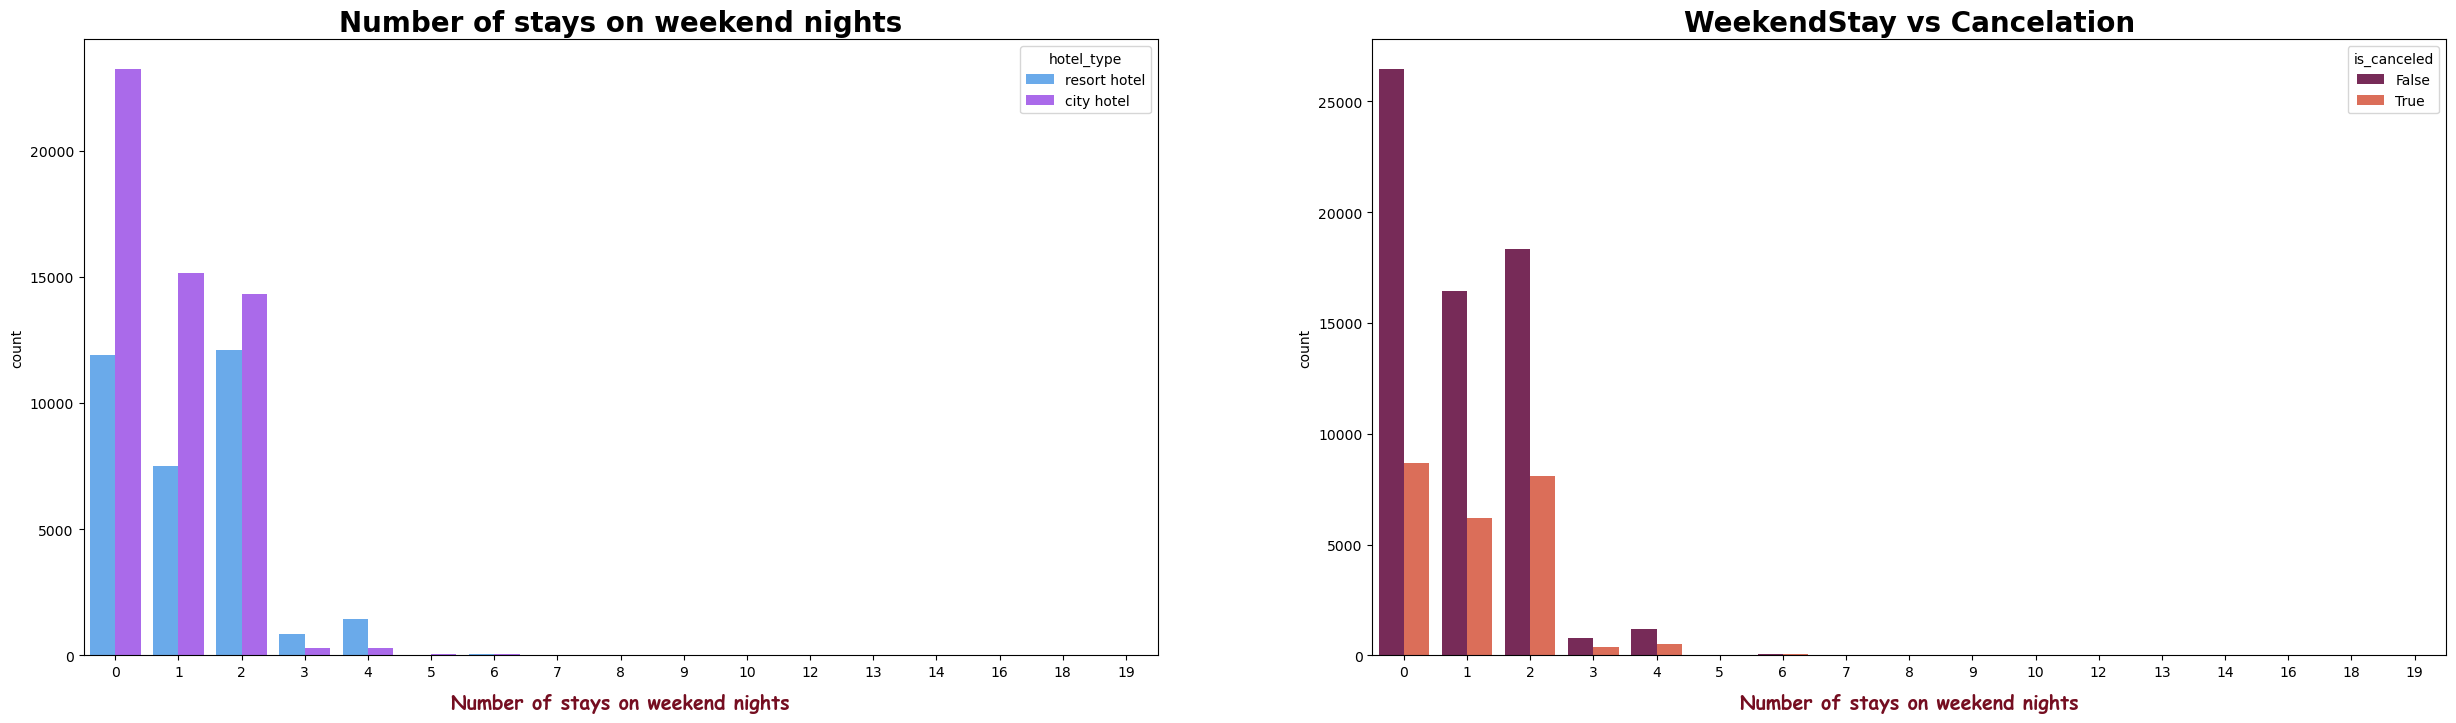

In [20]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel_type', data=cleaned_data, palette='cool')
# set x-axis label
plt.xlabel('Number of stays on weekend nights', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = cleaned_data, x = 'stays_in_weekend_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.xlabel('Number of stays on weekend nights', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'}, labelpad=10)

plt.show()

`COMMENT:`

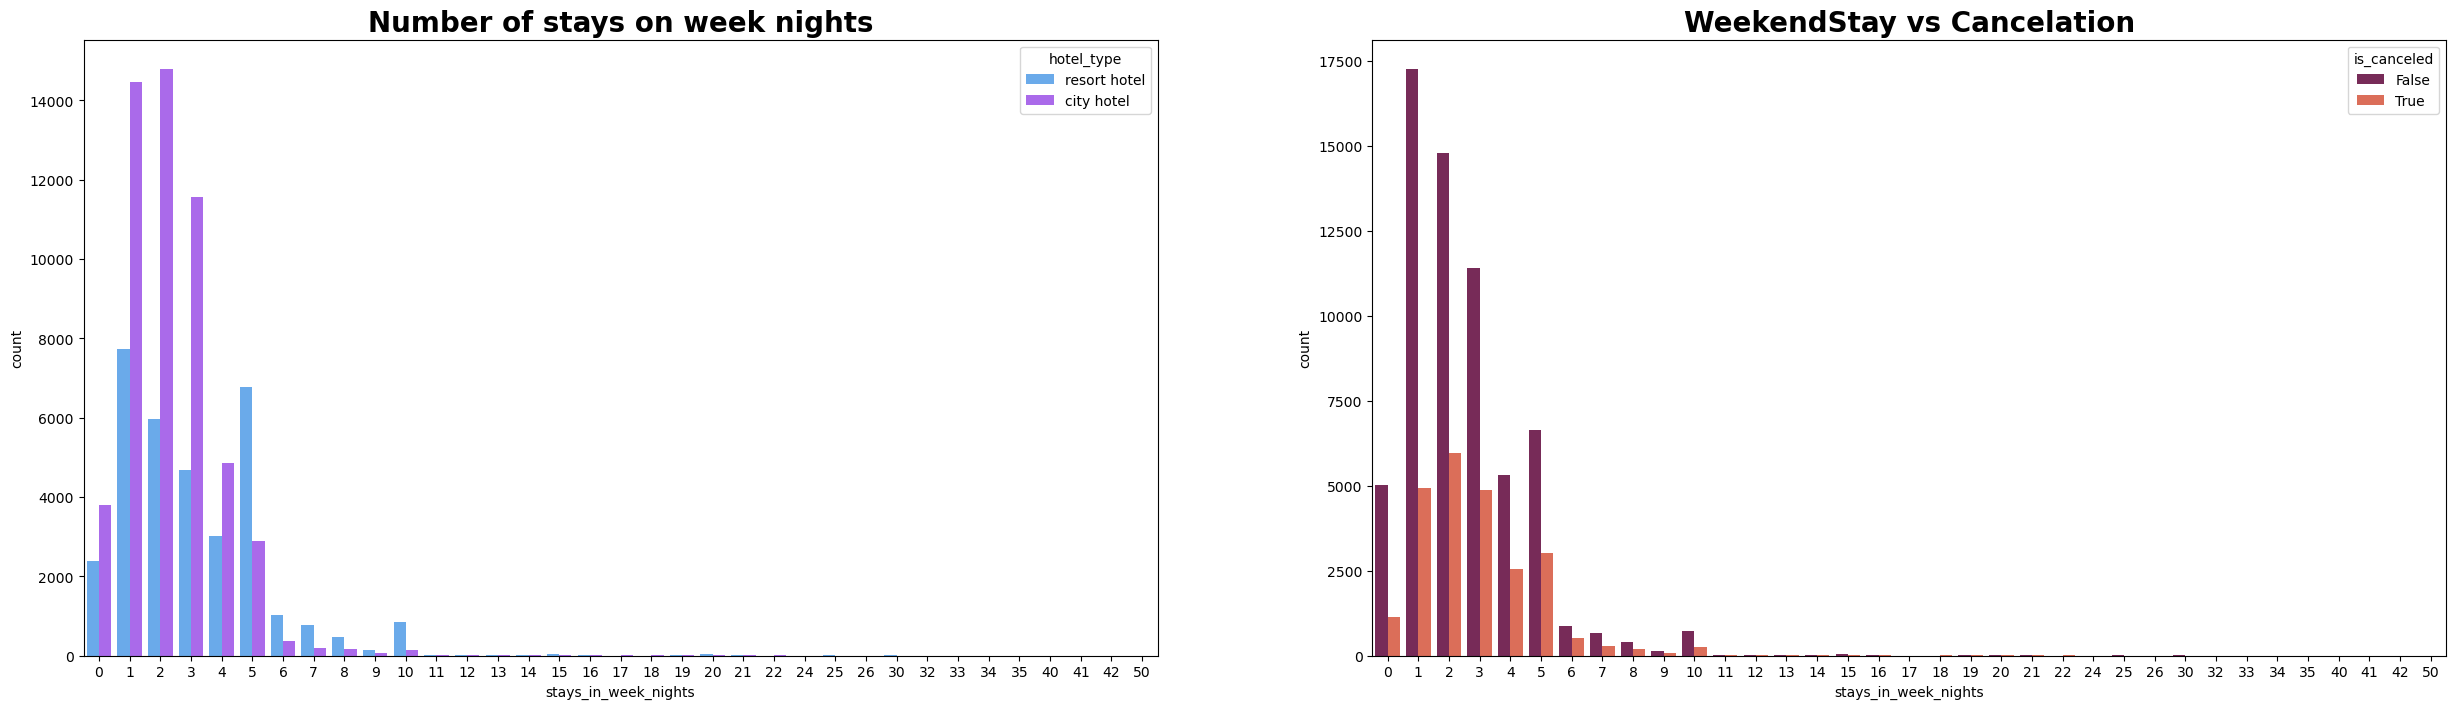

In [17]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel_type', data=cleaned_data, palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = cleaned_data, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

`COMMENT:`

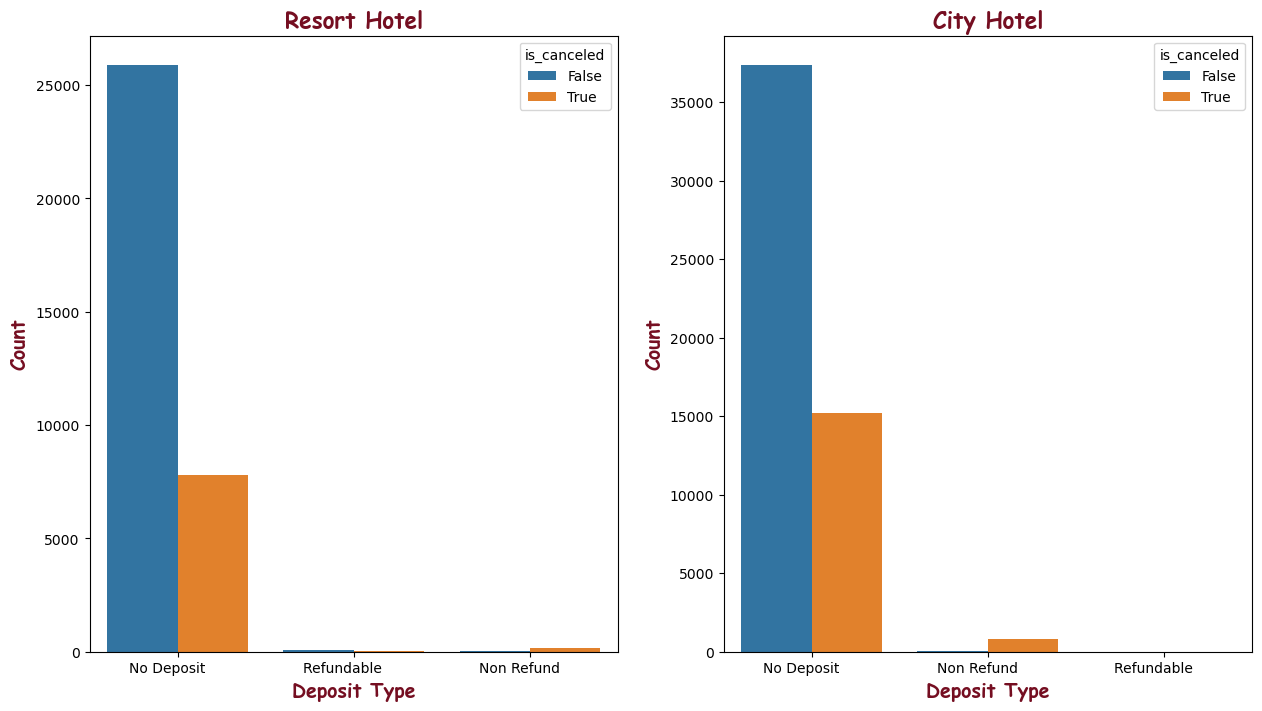

In [22]:
# deposit_type on cancelation on two hotel types
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x='deposit_type',hue='is_canceled', data=resort_hotel, ax=axs[0])
axs[0].set_title('Resort Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_xlabel('Deposit Type', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[0].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
sns.countplot(x='deposit_type',hue='is_canceled', data=city_hotel, ax=axs[1])
axs[1].set_title('City Hotel', fontdict={'fontsize': 16, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_xlabel('Deposit Type', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
axs[1].set_ylabel('Count', fontdict={'fontsize': 14, 'fontfamily': 'Comic Sans MS', 'fontweight': 'bold', 'color': '#750E21'})
plt.show()